In [3]:
ls

sub-010002_EC.fdt  sub-010065_EO.set  sub-010194_EO.fdt  sub-010261_EC.set
sub-010002_EC.set  sub-010066_EC.fdt  sub-010194_EO.set  sub-010261_EO.fdt
sub-010002_EO.fdt  sub-010066_EC.set  sub-010195_EC.fdt  sub-010261_EO.set
sub-010002_EO.set  sub-010066_EO.fdt  sub-010195_EC.set  sub-010262_EC.fdt
sub-010003_EC.fdt  sub-010066_EO.set  sub-010195_EO.fdt  sub-010262_EC.set
sub-010003_EC.set  sub-010067_EC.fdt  sub-010195_EO.set  sub-010262_EO.fdt
sub-010003_EO.fdt  sub-010067_EC.set  sub-010196_EC.fdt  sub-010262_EO.set
sub-010003_EO.set  sub-010067_EO.fdt  sub-010196_EC.set  sub-010263_EC.fdt
sub-010004_EC.fdt  sub-010067_EO.set  sub-010196_EO.fdt  sub-010263_EC.set
sub-010004_EC.set  sub-010068_EC.fdt  sub-010196_EO.set  sub-010263_EO.fdt
sub-010004_EO.fdt  sub-010068_EC.set  sub-010197_EC.fdt  sub-010263_EO.set
sub-010004_EO.set  sub-010068_EO.fdt  sub-010197_EC.set  sub-010264_EC.fdt
sub-010005_EC.fdt  sub-010068_EO.set  sub-010197_EO.fdt  sub-010264_EC.set
sub-010005_EC.set  sub-01

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = mne.io.read_raw_eeglab("sub-010321_EC.set")

Reading sub-010321_EC.fdt


<ipython-input-5-565e99c7f0e4>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab("sub-010321_EC.set")
<ipython-input-5-565e99c7f0e4>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab("sub-010321_EC.set")


In [9]:
%load_ext watermark

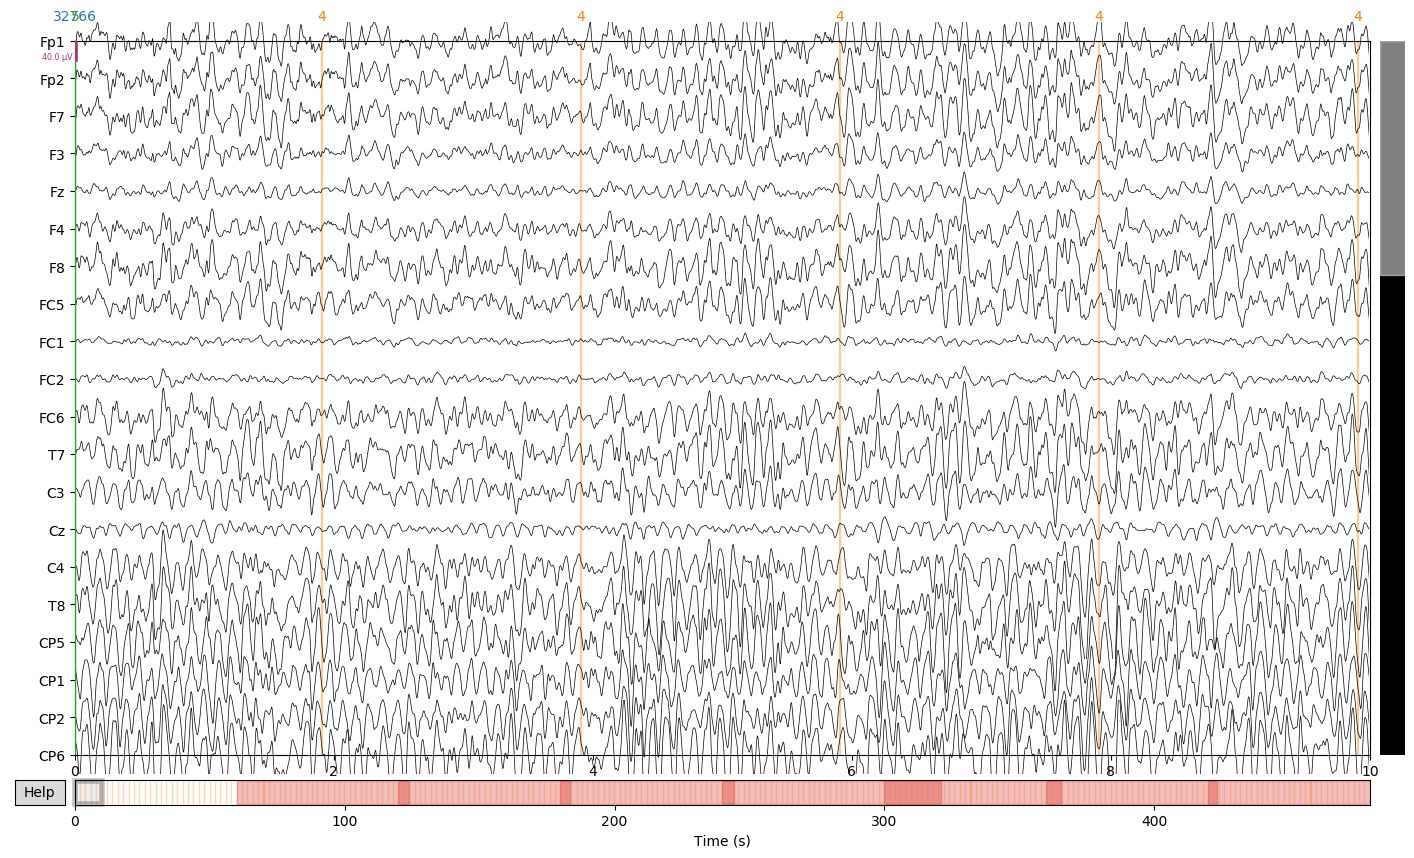

In [12]:
data.plot()

In [15]:
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter

In [34]:
data_ts = data.get_data().T[:,:,np.newaxis]

In [35]:
print("Original shape: ", data.get_data().shape)
print("New shape: ", data_ts.shape)

Original shape:  (61, 119976)
New shape:  (119976, 61, 1)


In [47]:
pca = UnsupervisedSpatialFilter(PCA(30), average=False)
pca_data_ts = pca.fit_transform(data_ts).squeeze()

In [39]:
pca_data_ts.shape

(119976, 30)

In [53]:
plt.figure()
plt.plot(pca_data_ts)
plt.show()

In [41]:
from mne.preprocessing import ICA

In [2]:
%load_ext watermark

In [4]:
%watermark --iversions

mne       : 0.21.dev0
matplotlib: 3.1.1
numpy     : 1.19.5

